# **Prodigy Infotech**
# Basmala Yasser
# Task:02

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files


uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     890 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          890 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         890 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     888 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


# **Cleaning the Dataset and Performing EDA**

In [9]:
print(df.isnull().sum())

PassengerId      0
Survived         1
Pclass           0
Name             0
Sex              1
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          687
Embarked         3
dtype: int64


In [10]:
df.drop(columns=['Cabin'], inplace = True)

In [11]:
df['Embarked'].value_counts()
df['Embarked'].fillna('S', inplace = True)

In [12]:
df['Age'].fillna(df['Age'].mean(), inplace = True)


In [13]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int')
df['Embarked'] = df['Embarked'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     890 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          890 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         890 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [15]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,890.000000
mean,446.000000,29.544332,0.523008,0.381594,32.210561
std,257.353842,13.013778,1.102743,0.806057,49.721008
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.903100
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


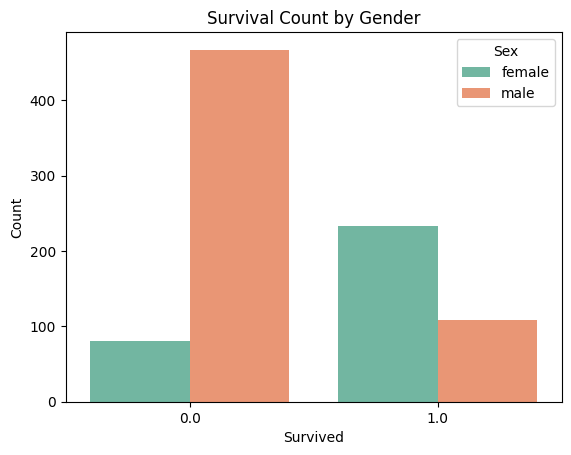

In [26]:
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set2')
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

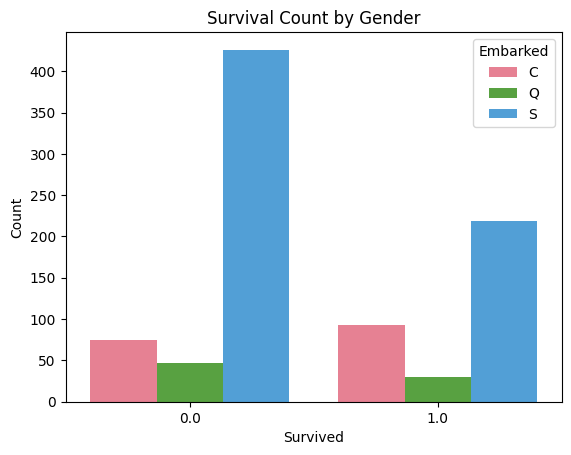

In [50]:
sns.countplot(x='Survived', hue='Embarked', data=df, palette='husl')
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

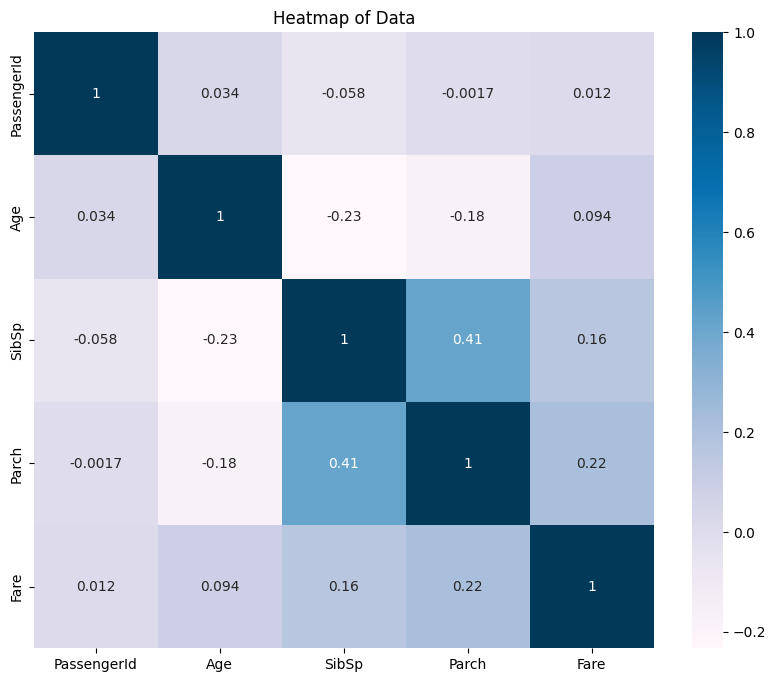

In [46]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))

sns.heatmap(numeric_data.corr(), annot=True, cmap='PuBu')
plt.title('Heatmap of Data')
plt.show()


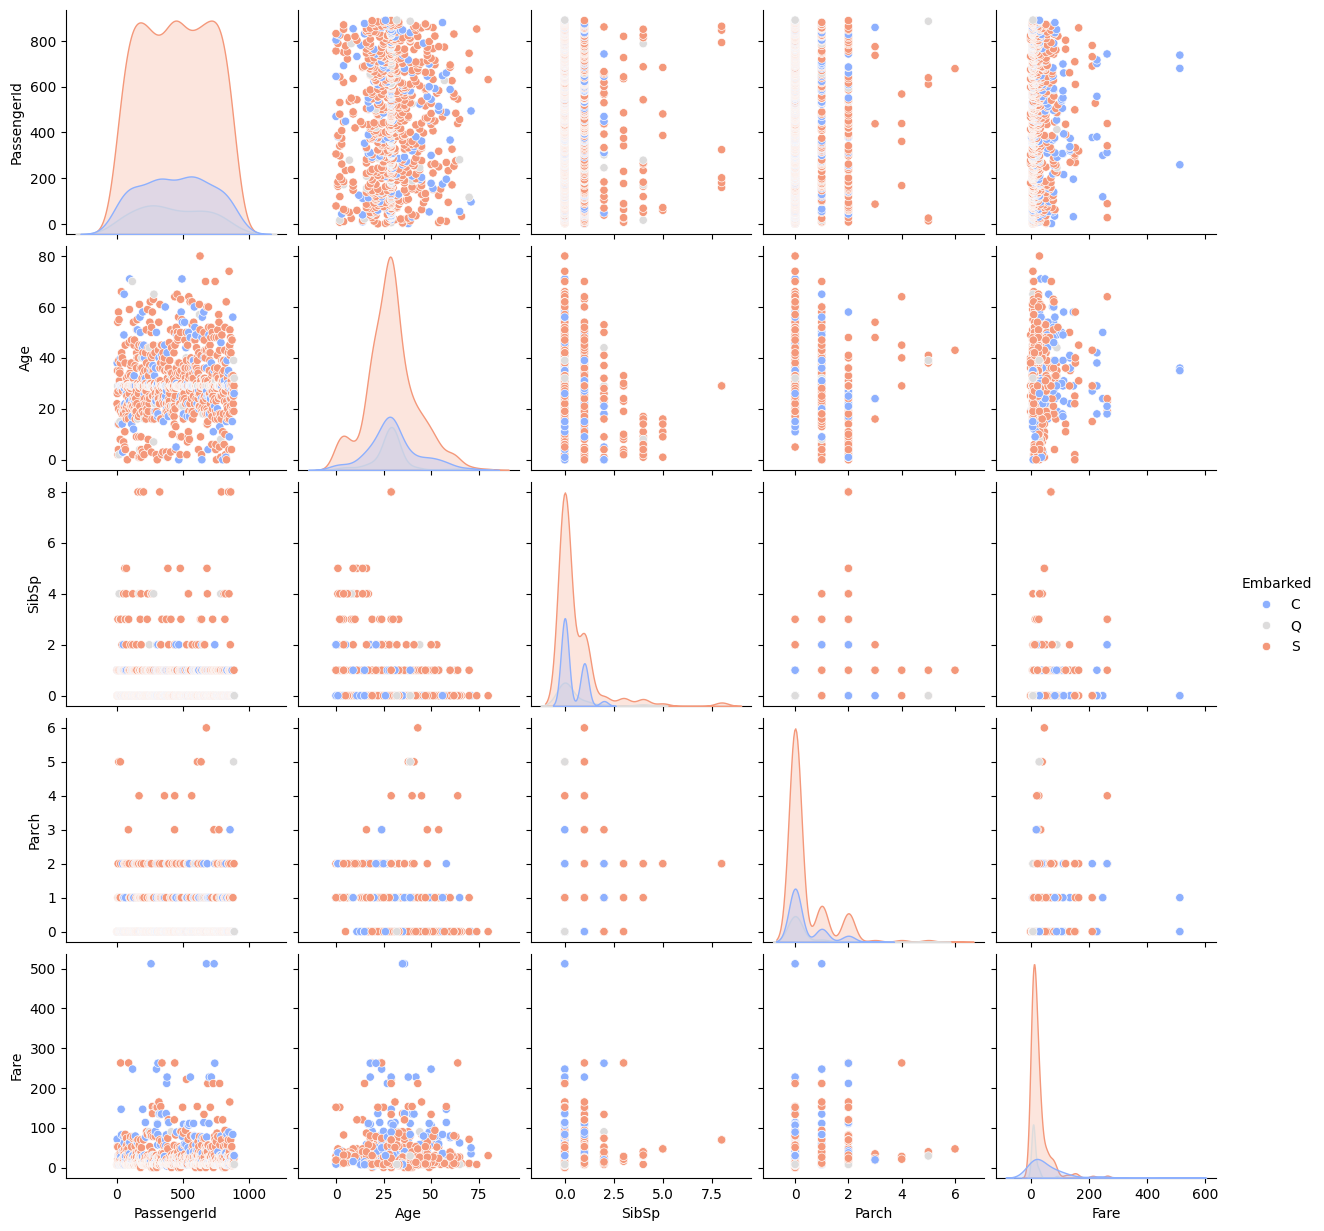

In [52]:
sns.pairplot(df, hue='Embarked', palette='coolwarm')